In [84]:
import serial
from serial.tools import list_ports
import json
import numpy as np
import time
from glob import glob   # To open files
import matplotlib.pyplot as plt

# Size plots & labels
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14

In [2]:
# Check what COM port it is on
from serial.tools import list_ports
for p in list_ports.comports():
    print(p)

COM3 - USB Serial Device (COM3)
COM1 - Communications Port (COM1)


In [3]:
# Set up a connection
ser = serial.Serial(
    "com3",
    baudrate = 115200,
    timeout = 1  # seconds - timeout needed so that device is not blocked indefinetly if it has no data
)

In [4]:
# String to byte conversion
def data(mystring):
    return bytes(mystring+'\n','utf-8')

In [5]:
delays = np.arange(200, 10000, 200)   # from 0.2 to 10 us in steps of 0.2

for delay in delays:
    js = json.dumps(dict(pulseWidth=20, interPulseDelay=float(delay), pulseInterval=10))   # delay is end-to-start difference
    
    ser.write(data(js))
    time.sleep(5)
    
#ser.readlines()

In [6]:
ser.close()

# Muon Detector

Observe the filoe with the highest amount of counts (final file) and aim to get the same amount with a lower discriminator threshold

In [64]:
paths = glob("Documents/JaviRoca/Run1/*")
total_counts = [0.0]

for path in paths:
    data = np.loadtxt(path, unpack=True, delimiter=' ')
    total_counts.append(np.sum(data))
    
max(total_counts)

43999.0

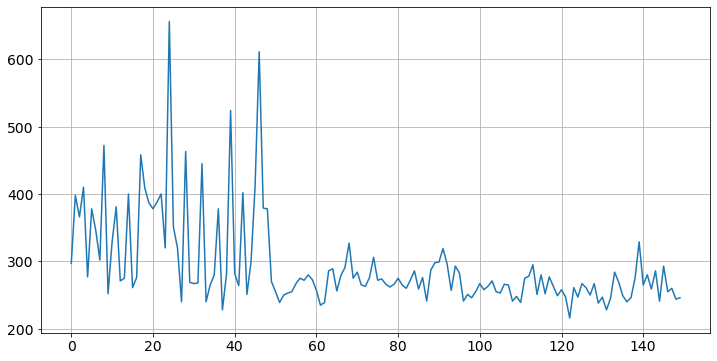

In [85]:
total_counts.sort()
count_rate = np.diff(total_counts)

hours = np.arange(0, len(count_rate), 1)

plt.plot(hours, count_rate)
plt.grid()